<a href="https://colab.research.google.com/github/gtoubian/cce/blob/main/4_1_Probability_Distributions_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Probability Distributions

To give us the probability of an event occuring, we make use of probability models which map an event in the sample space to a number between 0 and 1, otherwise known as the probability. There are two general probability distributions - Discrete and Continuous Distributions.

##Discrete Distributions

Discrete distributions deal with situations that have a distinct countable number of outcomes. Examples of this include: Flipping coin(s), rolling a dice, picking a card out of a deck, etc.

We can measure the probability of an event occuring using the formula that we have seen before in the probability lecture:

$$P (Event) = \frac{len(event space)}{len(sample space)}$$

###Bernoulli Distribution
The Bernoulli distribution deals with situations that have a binary outcome (0 or 1, heads or tails). 

$$f(k,p) = pk + (1-p)(1-k)$$

Where k is the event result (1 or 0) and p is the probability of k = 1 occuring. This is useful when modelling a coin flip.

###Binomial Distribution

Now let's say we have an n amount of coins to slip and we want to count the number of heads, (x). In this case, we use the binomial distribution which can be written as:

$$f(n,x,p) = \binom nx p^x(1-p)^{n-x}$$

###Poisson Distribution
The last discrete distribution we'll talk about for now is the Poisson Distribution. This distribution gives the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event. This distribution is written as:

$$p(x;λ)=\frac{e^{−λ}λ^{x}}{x!}$$ $$ for \ x=0,1,2,⋯$$

Where λ is the average rate of events occuring. If we have a time rate for r events to happen in a time, t, we can write λ = rt and the equation becomes:

$$p(x;λ)=\frac{e^{−rt}(rt)^{x}}{x!}$$ $$ for \ x=0,1,2,⋯$$

In python, we can view these distributions using the scipy package

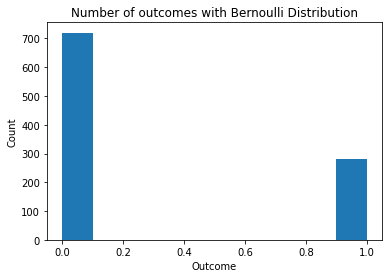

In [2]:
#Bernoulli Distribution
import scipy.stats as sc
import matplotlib.pyplot as plt

p = 0.3
r = sc.bernoulli.rvs(p, size= 1000)

plt.hist(r)
plt.title("Number of outcomes with Bernoulli Distribution")
plt.ylabel("Count")
plt.xlabel("Outcome")
plt.show()

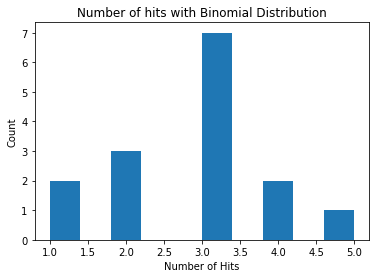

In [4]:
#Binomial Distribution

p = 0.3
n = 10
r = sc.binom.rvs(n, p, size=15)

plt.hist(r)
plt.title("Number of hits with Binomial Distribution")
plt.ylabel("Count")
plt.xlabel("Number of Hits")
plt.show()

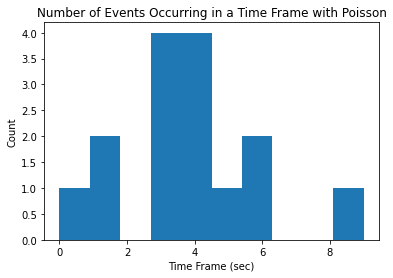

In [5]:
#Poisson Distribution

p = 0.3
x = 5
r = sc.poisson.rvs(x,p,size=15)

plt.hist(r)
plt.title("Number of Events Occurring in a Time Frame with Poisson")
plt.xlabel("Time Frame (sec)")
plt.ylabel("Count")
plt.show()

##Continuous Distributions

In situations where we have an infinite amount of possible events, we can't use the same formula that we use for Discrete Distributions. 

$$P (Event) = \frac{len(event space)}{len(sample space)}$$

In this case, $len(sample space) =  \infty$ which will make $P(event) = 0$

Instead, we measure a range of values $P(x>20)$. If we want to find the probability of an event being between 2 values, a & b we integrate our probability function.

$$P(a<x<b) = \int_{a}^{b} f(x) dx$$

**Note:** The above probability distribution function must be ***normalized***, or:

$$\int_{-\infty}^{\infty} f(x) dx = 1$$

###Exponential Distribution

The exponential distribution is a continuous distribution that is commonly used to measure the expected time for an event to occur. It is written as:

$$f(x,λ) = λe^{-(λx)}\\for\ x>0$$

###Normal Distribution

This is the most important distribution that you will come across. Ever. The normal distribution is the  distribution that alot of statistical tests are based off from and this distribution can be used to model a wide variety of phenomena. The distribution is written as:

$$f(x) = \frac{1}{σ\sqrt{2\pi}}e^{-\frac{1}{2} (\frac{x-μ}{σ})^2}$$

The **Standard Normal Distribution** is a normal distribution with μ=0 and σ=1. Any and all normal distribution can be converted to a standard normal distribution using the transformation:

$$Z = \frac{X - μ}{σ}$$

Let's plot these distributions using SciPy

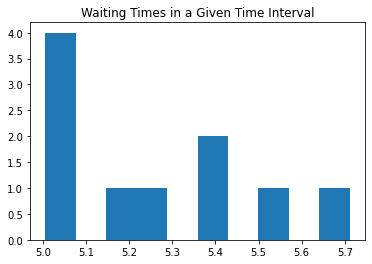

In [10]:
#Exponential Distribution
lamb=0.3
x = 5
r=sc.expon.rvs(x, lamb, size=10)

plt.hist(r)
plt.title("Waiting Times in a Given Time Interval")
plt.show()

#important for workshop
import random
random.seed()

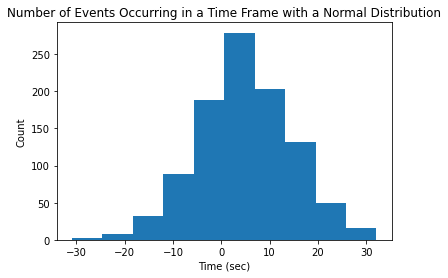

In [11]:
#Normal Distribution

miu = 5
sigma = 10

r=sc.norm.rvs(miu, sigma, size=1000)

plt.hist(r)
plt.title("Number of Events Occurring in a Time Frame with a Normal Distribution")
plt.xlabel("Time (sec)")
plt.ylabel("Count")
plt.show()

#Central Limit Theorem

This is a very important concept in Statistics. The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement, then the distribution of the sample means will be approximately normally distributed. Let's use the Binomial Distribution for example:

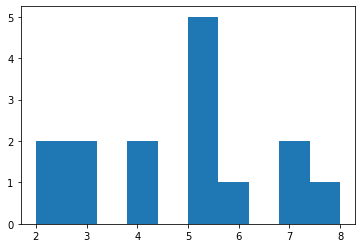

In [12]:
p = 0.5
n = 10
r = sc.binom.rvs(n, p, size=15)

plt.hist(r)
plt.show()

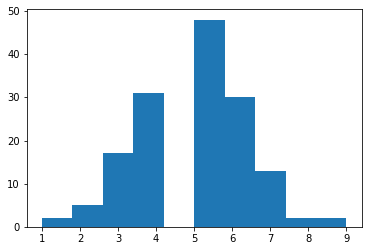

In [13]:
p = 0.5
n = 10
r = sc.binom.rvs(n, p, size=150)

plt.hist(r)
plt.show()

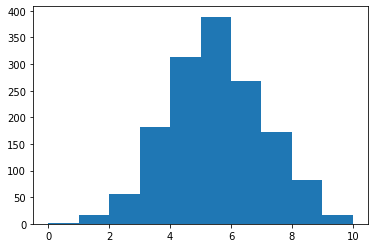

In [14]:
p = 0.5
n = 10
r = sc.binom.rvs(n, p, size=1500)

plt.hist(r)
plt.show()

##Likelihood and MLE

Likelihood gives us a measure of if the parameters for the distribution we use to model our data is a good fit for our model. This can be written as:

$$L(\theta | X_1,X_2,X_3,X_4,X_5...) = P(X_1,X_2,X_3,X_4,X_5...|\theta)$$

This is incredibly useful as we can obtain the parameters for a given probability distribution that most closely fit our Data by taking the derivative of this function with respect to $\theta$ and setting the derivative to Zero. The parameter $\theta$ that satisfies this equation is known as the **Maximum Likelihood Estimator** or **MLE**.

In [17]:
import numpy as np
import math

x=np.array([[1,2,3,4,5]])

n = np.shape(x)[1]

print("The simple data: \n", x)
print("The Number of data present in x is: ",n)

mu = np.array([[1,2,3,2,3]])
sigma = np.array([[1,2,2,3,3]])
print("\n The mean is: ", mu)
print("The St. dev is ", sigma)

print ("Mu Sigma logL")

for i in range(5):
  logL = np.sum(np.square(x-mu[0,i])/(2*np.square(sigma[0,i]))) - (0.5*n*np.log10(2*math.pi)) - n*np.log10(sigma[0,i])
  print(mu[0,i], sigma[0,i], np.round(logL,3))

The simple data: 
 [[1 2 3 4 5]]
The Number of data present in x is:  5

 The mean is:  [[1 2 3 2 3]]
The St. dev is  [[1 2 2 3 3]]
Mu Sigma logL
1 1 13.005
2 2 -1.626
3 2 -2.251
2 3 -3.548
3 3 -3.826


##Hypothesis Testing

To put it simply, hypothesis testing allows us to use our data to see if there is a statistically significant difference between two or more groups. Usually with hypothesis testing, we have a null hypothesis that we either **reject or fail to reject** NEVER accept. The null hypothesis is a hypothesis that essentially states that any difference between the two groups we are testing is up to random chance. We can assess statistical significance using a **p value**. A p value is the likelihood that we'd get our data given we model our data with the parameters specified by the null hypothesis. Usually, if our p value is under 0.05 we can reject our null hypothesis as the likelihood of our data coming from random chance is less than 5%.

Take for example, we have two groups of students: One group that didn't study for a test and another group that did and took their scores out of 20 on the test. We can easily run a t test on the data using scipy.

***We are going to be diving further into hypothesis testing tomorrow***



In [19]:
grp1 = [0,1,4,5,2,10,11]
grp2 = [11,15,18,20,19]

sc.ttest_ind(grp1, grp2)

Ttest_indResult(statistic=-5.0028338608131415, pvalue=0.0005350941686363989)